# Estación El Pardo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_58.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,21.258065
2013-02-01,13.161290
2013-03-01,11.161290
2013-04-01,13.838710
2013-05-01,17.032258


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

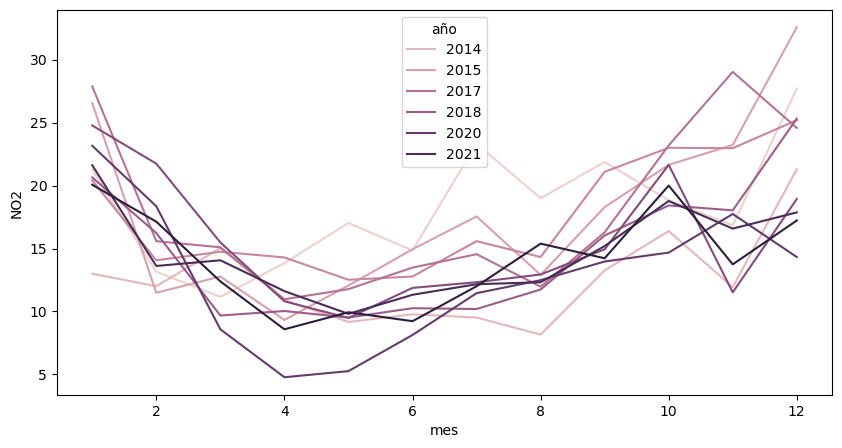

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

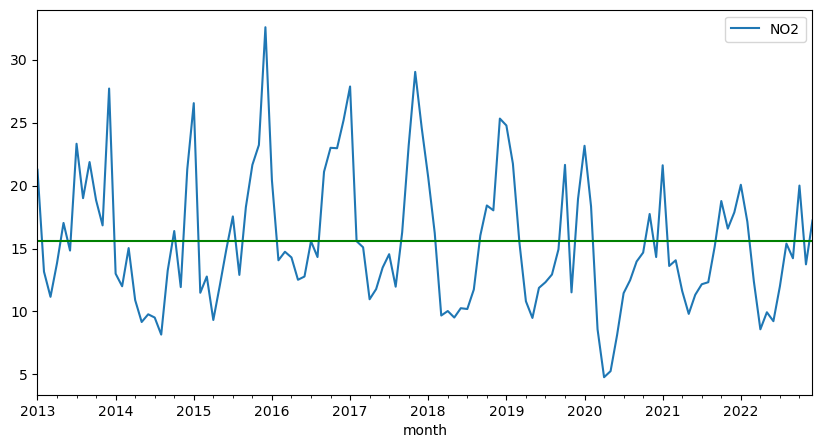

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

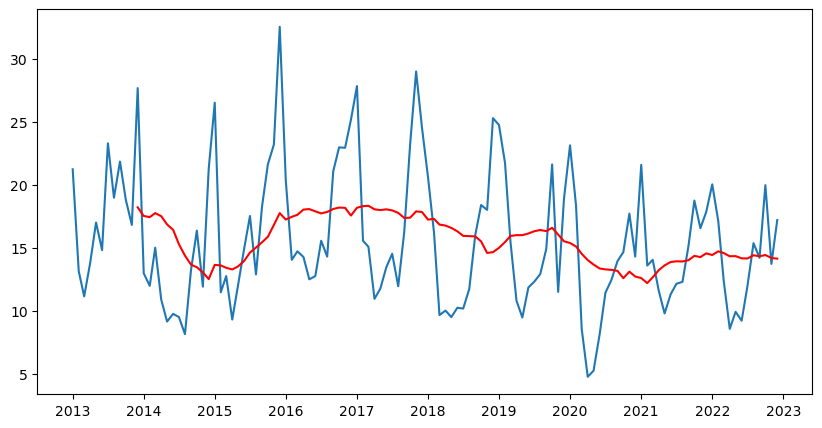

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,21.258065
2013-02-01,13.161290
2013-03-01,11.161290
2013-04-01,13.838710
2013-05-01,17.032258


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,21.258065,2013,1
2013-02-01,13.161290,2013,2
2013-03-01,11.161290,2013,3
2013-04-01,13.838710,2013,4
2013-05-01,17.032258,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,21.258065,2013,1
2013-02-01,13.161290,2013,2
2013-03-01,11.161290,2013,3
2013-04-01,13.838710,2013,4
2013-05-01,17.032258,2013,5


In [16]:
df[df3["month"] == 12]

,NO2
month,
2013-12-01,27.709677
2014-12-01,21.290323
2015-12-01,32.580645
2016-12-01,25.193548
2017-12-01,24.580645
2018-12-01,25.322581
2019-12-01,18.935484
2020-12-01,14.322581
2021-12-01,17.870968


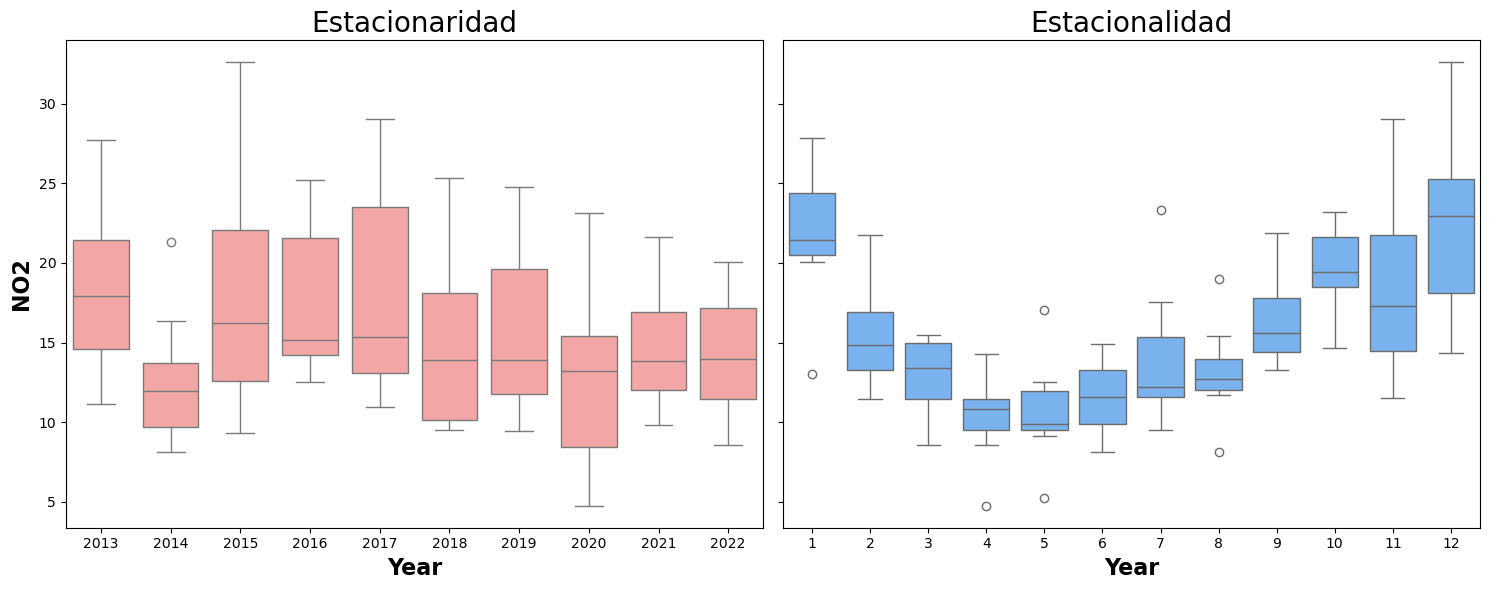

In [17]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [18]:
res = adfuller(df["NO2"])
res

(-1.8882018172807873,
 0.3376315408779096,
 13,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 582.5868146851622)

In [19]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -1.8882018172807873
p-value 0.3376315408779096
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [20]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.599952200687049
2 mes Lag, 0.32482529434690804
3 mes Lag, 0.08417670552781192
4 mes Lag, -0.19665796878204908
5 mes Lag, -0.3498345025745335
6 mes Lag, -0.3890898504928461
7 mes Lag, -0.40596739218229316
8 mes Lag, -0.29741255196629585
9 mes Lag, -0.021550457268652956
10 mes Lag, 0.2356414540587323
11 mes Lag, 0.45983073307358613
12 mes Lag, 0.6080921511017772
13 mes Lag, 0.5244443732707119
14 mes Lag, 0.2421385080297541
15 mes Lag, 0.029987360020890995
16 mes Lag, -0.2815910923381036
17 mes Lag, -0.4437617927882322
18 mes Lag, -0.4464940945247071
19 mes Lag, -0.44313810602812337
20 mes Lag, -0.3058994650552947
21 mes Lag, -0.053270440707803936
22 mes Lag, 0.14711607860696557
23 mes Lag, 0.46129634031201455
24 mes Lag, 0.6894347296665062
25 mes Lag, 0.5297095997472289
26 mes Lag, 0.2886373421912914
27 mes Lag, 0.04816990973060985
28 mes Lag, -0.2422214402314898
29 mes Lag, -0.4222657480613091
30 mes Lag, -0.49780490323948556
31 mes Lag, -0.4655917340982682
3

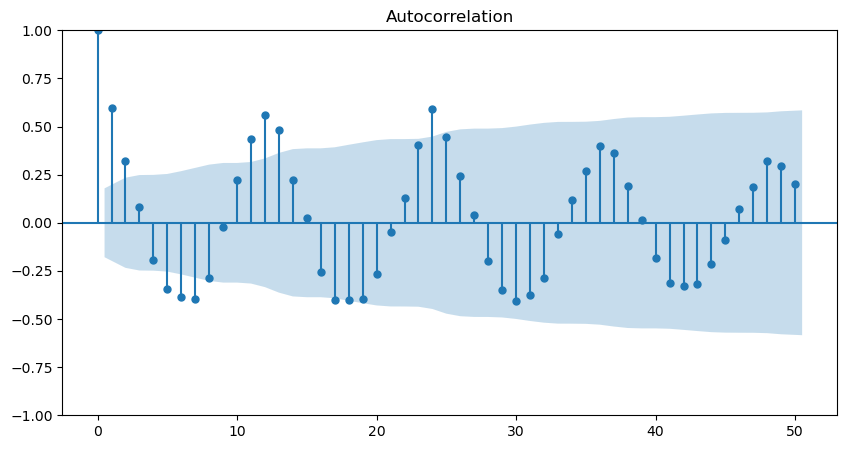

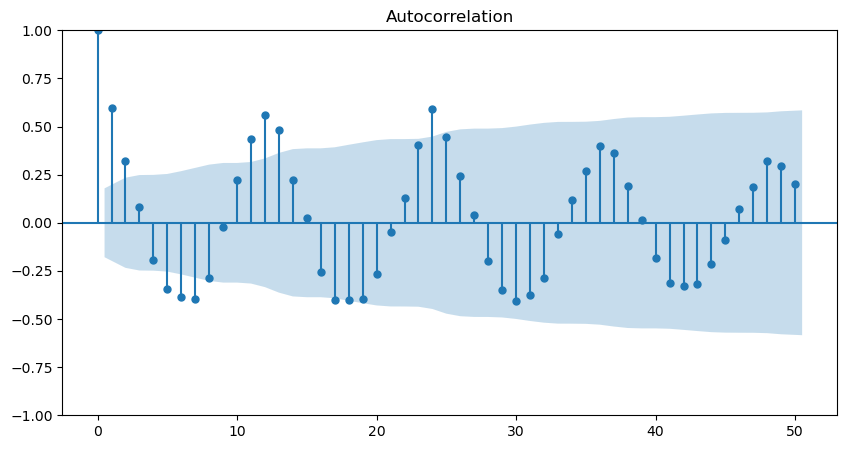

In [21]:
plot_acf(df, lags = 50)

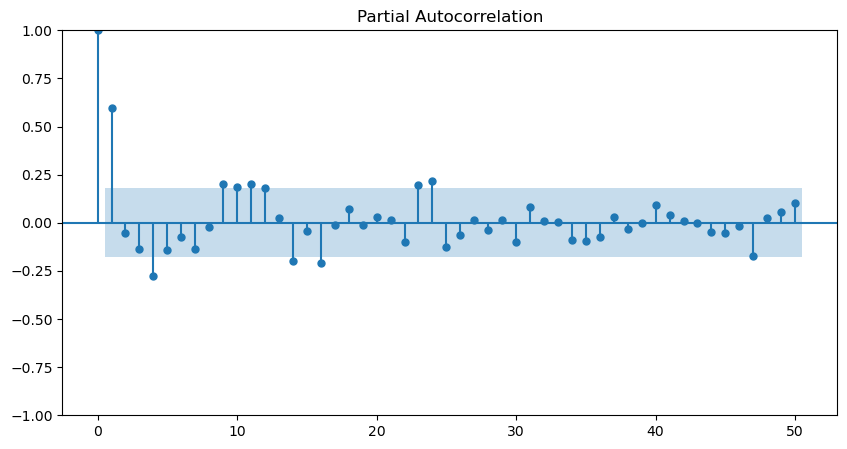

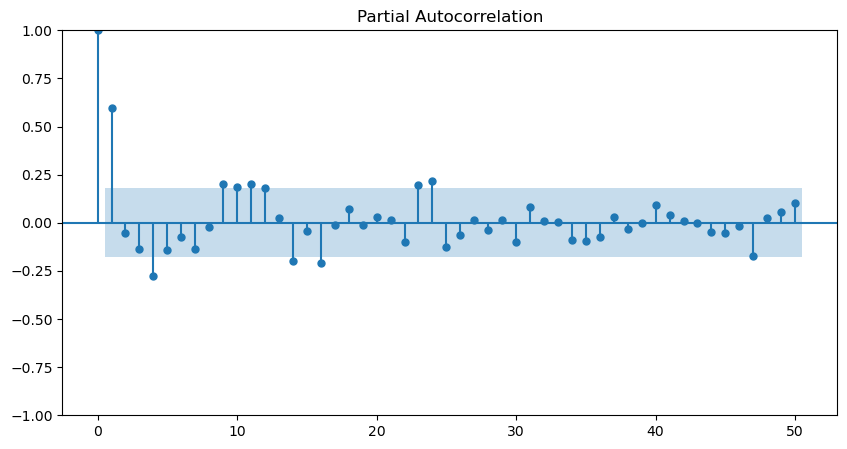

In [22]:
plot_pacf(df, lags = 50)

In [23]:
df.head()

,NO2
month,
2013-01-01,21.258065
2013-02-01,13.161290
2013-03-01,11.161290
2013-04-01,13.838710
2013-05-01,17.032258


In [24]:
df.shape

(120, 1)

In [25]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [26]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [27]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [28]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 62%|██████▎   | 15/24 [00:00<00:00, 23.10it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 469 ms
Wall time: 1.27 s


In [29]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
7,3.538661,"(1, 1, 1)"
14,3.542523,"(2, 1, 2)"
8,3.552131,"(1, 1, 2)"
20,3.557079,"(3, 1, 2)"
2,3.655288,"(0, 1, 2)"


In [30]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(1, 1, 1, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

Error mae:  2.298075981393656
CPU times: total: 31.2 ms
Wall time: 76 ms


C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,real,pred,error
2020-07-01,11.451613,9.819796,-1.631817
2020-08-01,12.483871,11.502869,-0.981001
2020-09-01,13.967742,15.426180,1.458438
2020-10-01,14.677419,19.627480,4.950061
2020-11-01,17.741935,16.625586,-1.116350
2020-12-01,14.322581,23.221792,8.899212
2021-01-01,21.612903,24.003972,2.391069
2021-02-01,13.612903,20.267122,6.654219
2021-03-01,14.064516,12.922943,-1.141573
2021-04-01,11.612903,8.847247,-2.765656


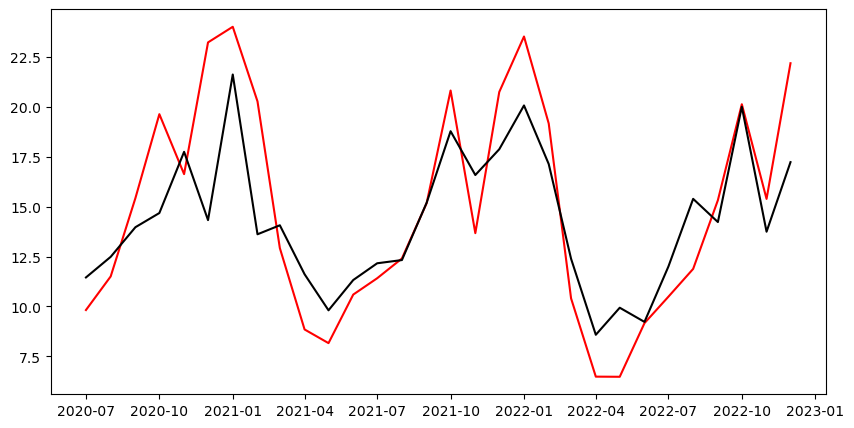

In [31]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [32]:
pred["real_test"] = y_test

In [33]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-01-01,23.799399
2023-02-01,19.801659
2023-03-01,11.865414
2023-04-01,7.855218
2023-05-01,7.455284
2023-06-01,9.993700
2023-07-01,11.024068
2023-08-01,12.181997
2023-09-01,15.234864
2023-10-01,20.524340


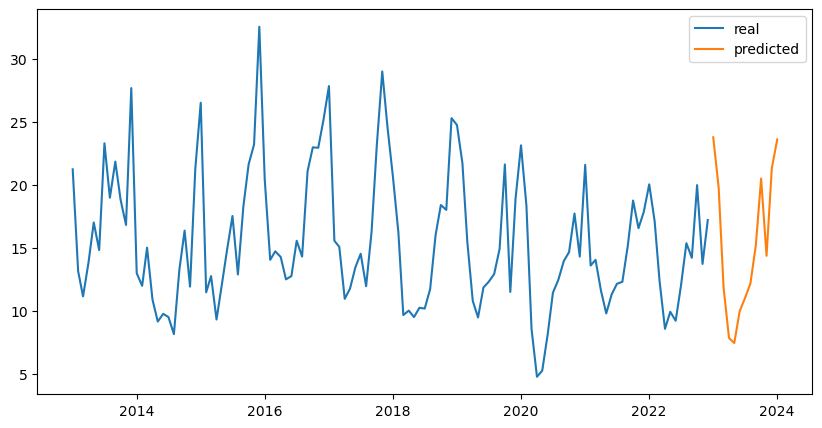

In [34]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [35]:
pred_año.mean()

predicted_mean    15.315661
dtype: float64

In [36]:
#Corrección primer valor de la predicción

# Obtener el valor de la fila '2023-01-01' y columna 'predicted_mean' en pred_año
valor_pred_año = pred_año.loc['2023-01-01', 'predicted_mean']

# Obtener el valor de la fila '2023-10-01' y columna 'NO2' en df
valor_df = df.loc['2022-12-01', 'NO2']

# Calcular la media entre los dos valores
media = (valor_pred_año + valor_df) / 2

# Sustituir el valor calculado en pred_año
pred_año.loc['2023-11-01', 'predicted_mean'] = media

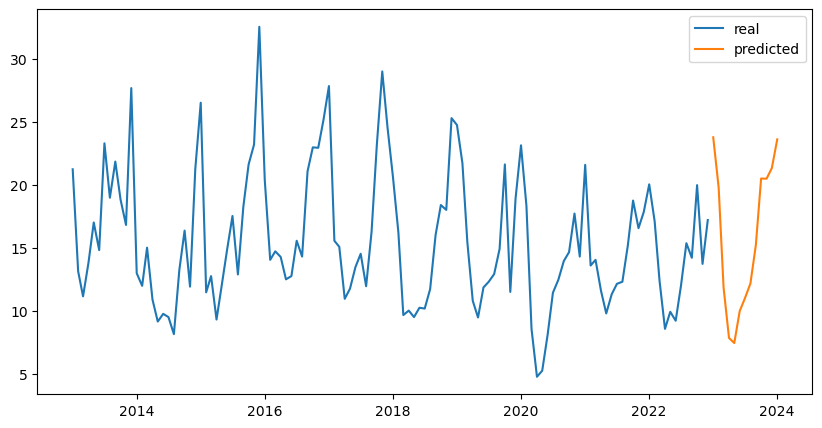

In [37]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [38]:
pred_año.mean()

predicted_mean    15.78672
dtype: float64